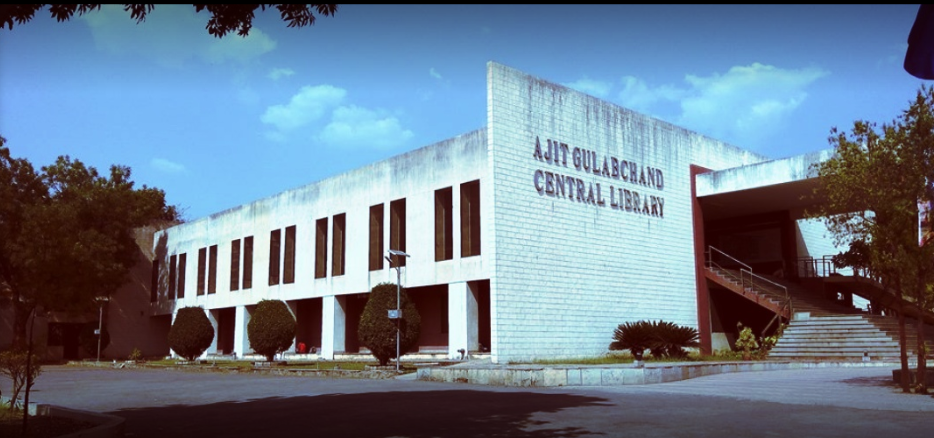

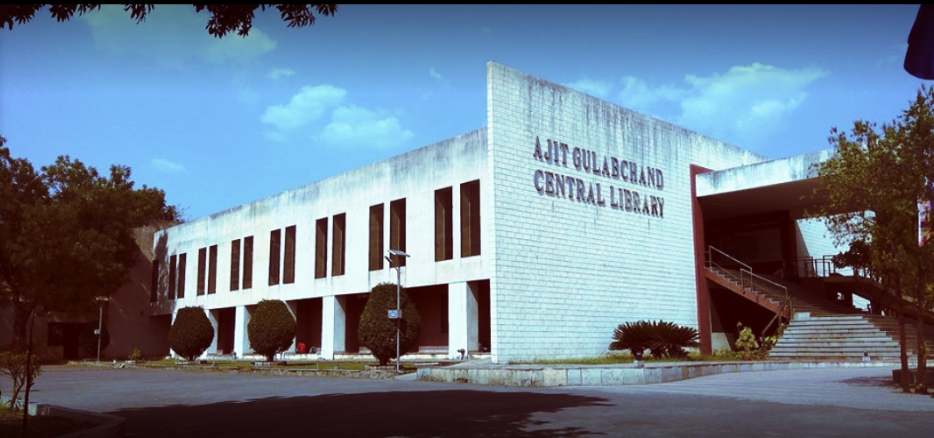

PSNR: 53.30991938842334


In [ ]:
import cv2
import numpy as np
import pywt
from google.colab.patches import cv2_imshow

# Load the image
image_path = "campus.png"  # Replace with your image path
original_image = cv2.imread(image_path)

# Convert the image to YCbCr color space
ycbcr_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2YCR_CB)

# Extract the Y channel (luminance)
y_channel = ycbcr_image[:,:,0]

# Perform DWT on the Y channel
coeffs = pywt.dwt2(y_channel, 'haar')

# Reconstruct the image from the DWT coefficients
reconstructed_y = pywt.idwt2(coeffs, 'haar')

# Replace the Y channel with the reconstructed one
reconstructed_image = np.copy(ycbcr_image)
reconstructed_image[:,:,0] = reconstructed_y

# Convert the image back to BGR color space
reconstructed_image = cv2.cvtColor(reconstructed_image, cv2.COLOR_YCR_CB2BGR)

# Calculate PSNR between original and reconstructed images
psnr = cv2.PSNR(original_image, reconstructed_image)

# Display original and reconstructed images
cv2_imshow(original_image)
cv2_imshow(reconstructed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("PSNR:", psnr)
#PSNR = 10 ⋅ log 10 ⁡ ( 9 × 255 2 7 )

In [ ]:
# DWT is applied separately to the luminance (Y) and chrominance (Cb and Cr) channels. This is because human vision is more sensitive to changes in luminance than in chrominance,
# so allocating more bits to encode luminance information can lead to better perceived image quality for the same amount of data. By performing the DWT on the luminance channel,
# compression algorithms can exploit the redundancy and perceptual properties of the luminance component more effectively.

'''

The Discrete Wavelet Transform (DWT) is a mathematical technique used for signal and image processing.
It represents a signal as a sum of wavelet functions at different scales and positions.
The DWT is particularly useful for analyzing and processing signals with localized features or sharp changes, such as images.
'''
